<a href="https://colab.research.google.com/github/paq67/Elevate-Labs-Day-2-/blob/main/Day_5_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Step 2: Drop 'Cabin' column (too many missing values)
if 'Cabin' in df.columns:
    df.drop(columns='Cabin', inplace=True)

# Step 3: Fill missing 'Age' values with median age based on Pclass and Sex
if {'Age', 'Pclass', 'Sex'}.issubset(df.columns):
    df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Step 4: Fill missing 'Embarked' with the most common port
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Step 5: Remove duplicate rows
df.drop_duplicates(inplace=True)

# Step 6: Extract title from passenger names
if 'Name' in df.columns:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Step 7: Create new 'FamilySize' feature
if {'SibSp', 'Parch'}.issubset(df.columns):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Step 8: Convert categorical data to numbers
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Title'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})

# Step 9: Drop unused columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Step 10: Save cleaned data
df.to_csv('titanic_cleaned.csv', index=False)
# Display the first 10 rows of the cleaned dataset
print("\n📄 First 10 rows of the cleaned Titanic dataset:")
print(df.head(10))

# Display the final shape and any remaining missing values
print("\n📊 Dataset shape after cleaning:", df.shape)
print("\n❓ Missing values after cleaning:")
print(df.isnull().sum())




📄 First 10 rows of the cleaned Titanic dataset:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  \
0         0       3    0  22.0      1      0   7.2500         0      0   
1         1       1    1  38.0      1      0  71.2833         1      2   
2         1       3    1  26.0      0      0   7.9250         0      1   
3         1       1    1  35.0      1      0  53.1000         0      2   
4         0       3    0  35.0      0      0   8.0500         0      0   
5         0       3    0  25.0      0      0   8.4583         2      0   
6         0       1    0  54.0      0      0  51.8625         0      0   
7         0       3    0   2.0      3      1  21.0750         0      3   
8         1       3    1  27.0      0      2  11.1333         0      2   
9         1       2    1  14.0      1      0  30.0708         1      2   

   FamilySize  
0           2  
1           2  
2           1  
3           2  
4           1  
5           1  
6           1  
7       

<ipython-input-2-55956bfe04e0>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


📊 .describe():
          Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.112424    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.304424    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   21.500000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   26.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   36.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked       Title  FamilySize  
count  891.000000  891.000000  891.000000  891.000000  
mean    32.204208    0.361392    0.728395    1.904602  
std     49.693429    0.635673    1.030039    1.613459  
min      0.000000    0.000000 

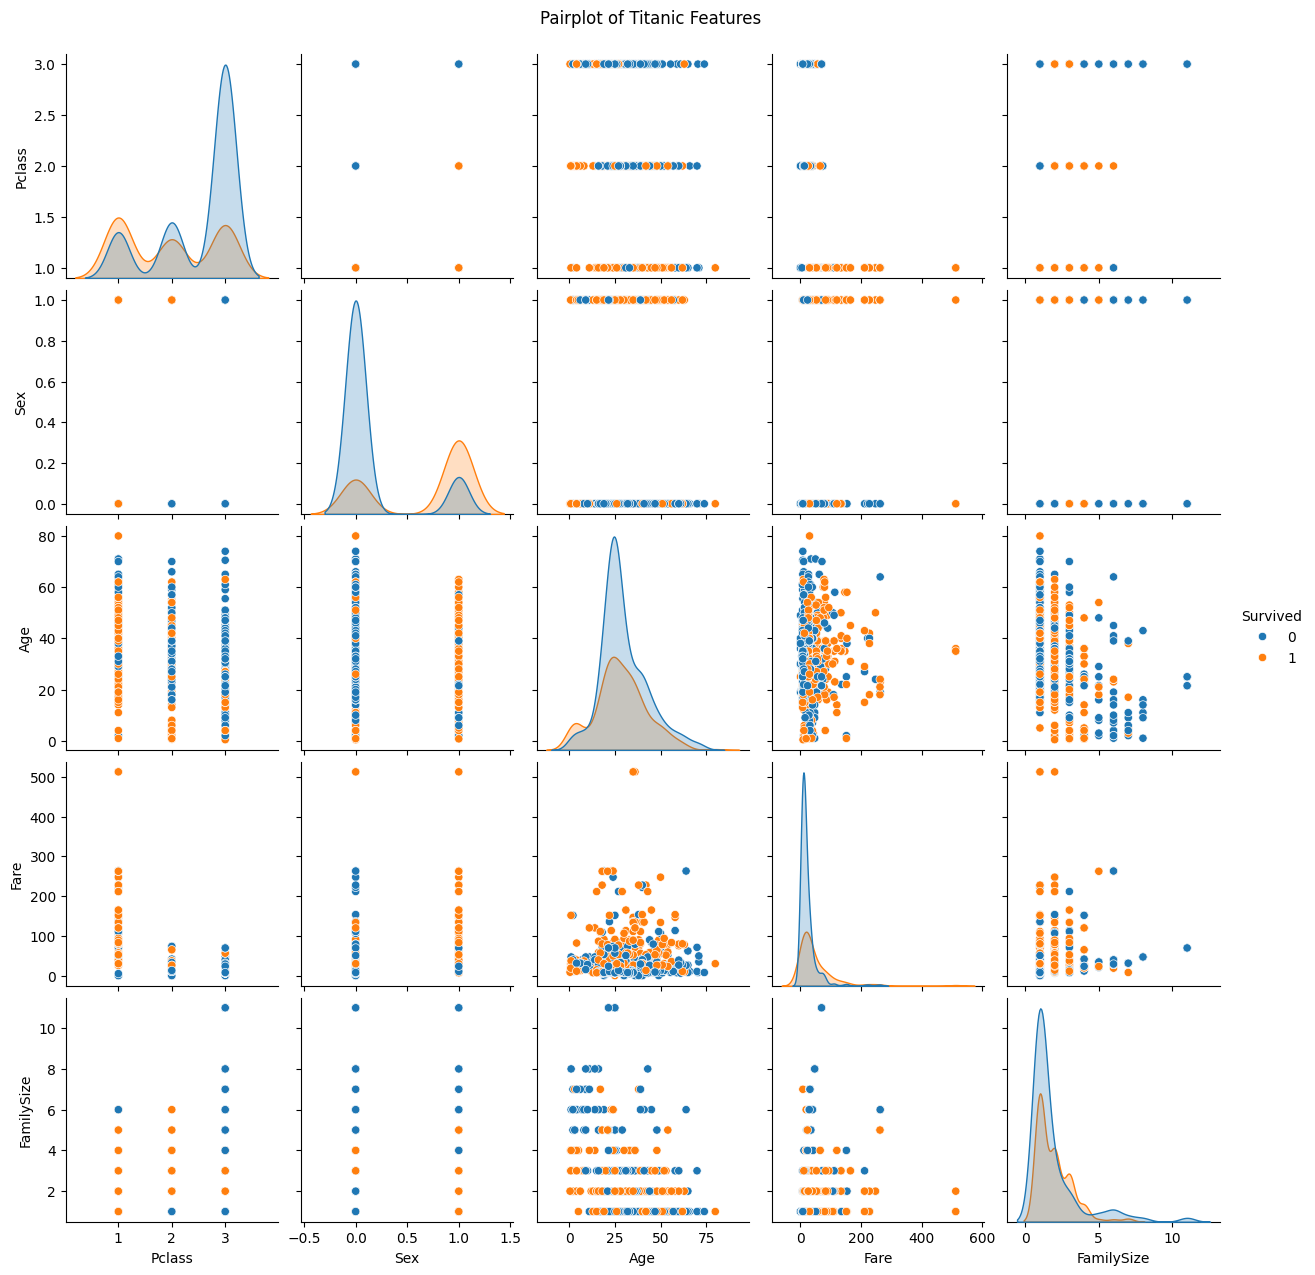

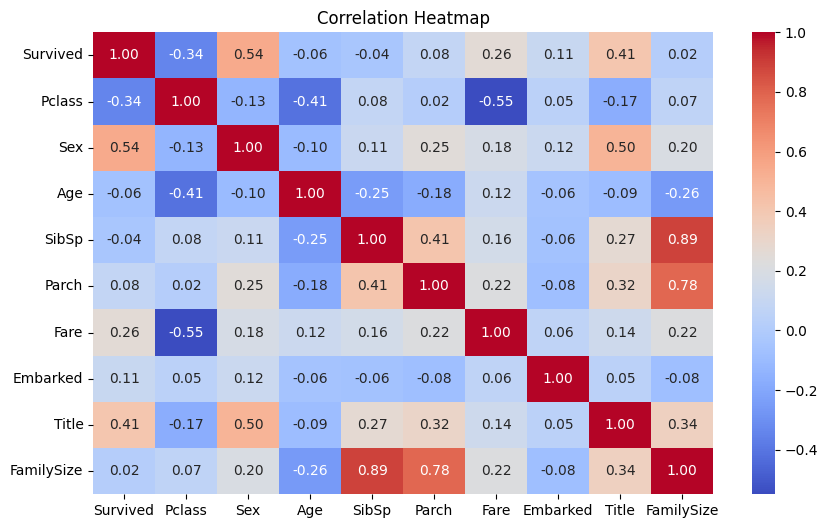

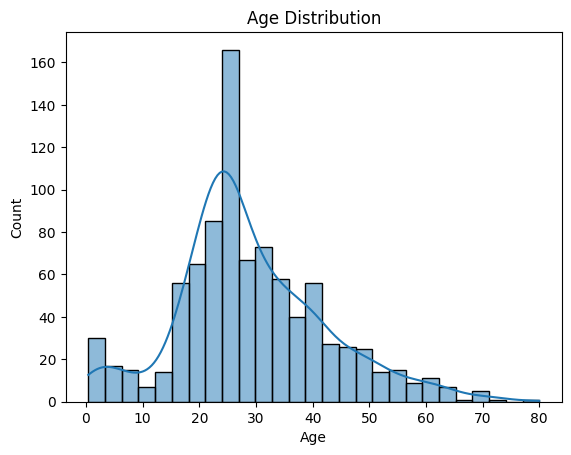

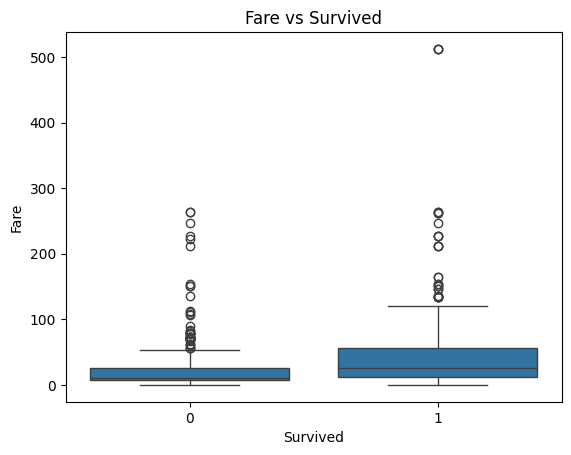

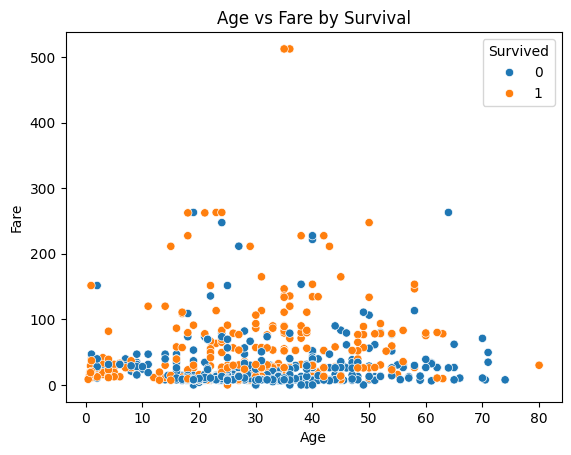


📝 Observations:
- Pairplot: Survivors generally had higher fares and were in higher Pclass.
- Heatmap: Fare and Pclass correlate with survival; Age has moderate impact.
- Histogram: Majority were young adults; few older passengers.
- Boxplot: Survivors tended to pay higher fares.
- Scatterplot: Younger and high-fare passengers had better survival.

📌 Summary of Findings:
- Women and 1st class passengers had higher survival rates.
- Fare and Pclass are strong predictors of survival.
- Family size has a non-linear effect—medium families survived more.
- Missing data was handled and dataset is now clean.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("titanic_cleaned.csv")

# a. Data Summary
print("📊 .describe():\n", df.describe())
print("\nℹ️ .info():")
df.info()
print("\n🧮 .value_counts():")
print("Survived:\n", df['Survived'].value_counts())
print("Sex:\n", df['Sex'].value_counts())
print("Embarked:\n", df['Embarked'].value_counts())
print("Pclass:\n", df['Pclass'].value_counts())

# b. Visualizations
# Pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']], hue='Survived')
plt.suptitle("Pairplot of Titanic Features", y=1.02)
plt.show()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# d. Other plots
# Histogram
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Boxplot
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survived")
plt.show()

# Scatterplot
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare by Survival")
plt.show()

# e. Observations
print("\n📝 Observations:")
print("- Pairplot: Survivors generally had higher fares and were in higher Pclass.")
print("- Heatmap: Fare and Pclass correlate with survival; Age has moderate impact.")
print("- Histogram: Majority were young adults; few older passengers.")
print("- Boxplot: Survivors tended to pay higher fares.")
print("- Scatterplot: Younger and high-fare passengers had better survival.")

# f. Summary
print("\n📌 Summary of Findings:")
print("- Women and 1st class passengers had higher survival rates.")
print("- Fare and Pclass are strong predictors of survival.")
print("- Family size has a non-linear effect—medium families survived more.")
print("- Missing data was handled and dataset is now clean.")
